In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score

from sklearn.metrics import classification_report




plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [17]:
df = pd.read_csv("../data/eda_data.csv")

In [18]:
df.head()


,img,asd,sp_idx,sp_fix_count,sp_fix_duration_ms_total,sp_fix_duration_ms_mean,sp_len_px_total,sp_saccade_amplitude_px_mean,sp_saccade_amplitude_px_median,sp_distance_to_centre_px_mean,sp_distance_to_centre_px_median,sp_distance_to_sp_mean_px_mean,sp_distance_to_sp_mean_px_median
0,126,1,0,12,2098,174.833333,1734.793605,157.708510,159.088026,227.831857,226.993379,184.724185,194.257522
1,126,1,1,12,3572,297.666667,1772.309555,161.119050,154.304893,242.881637,221.051469,198.851422,150.777681
2,126,1,2,5,349,69.800000,837.418654,209.354663,204.225322,308.465269,299.132078,175.714929,131.979392
3,126,1,3,1,50,50.000000,0.000000,0.000000,0.000000,603.238759,603.238759,0.000000,0.000000
4,126,1,4,1,108,108.000000,0.000000,0.000000,0.000000,238.533017,238.533017,0.000000,0.000000


In [19]:
df0 = df[df["asd"]==0]
df1 = df[df["asd"]==1]
df0.head()

,img,asd,sp_idx,sp_fix_count,sp_fix_duration_ms_total,sp_fix_duration_ms_mean,sp_len_px_total,sp_saccade_amplitude_px_mean,sp_saccade_amplitude_px_median,sp_distance_to_centre_px_mean,sp_distance_to_centre_px_median,sp_distance_to_sp_mean_px_mean,sp_distance_to_sp_mean_px_median
3761,88,0,0,11,3165,287.727273,2287.822242,228.782224,216.058463,313.617589,243.836010,176.777280,163.521803
3762,88,0,1,7,3339,477.000000,1462.238296,243.706383,227.782832,382.451012,353.101968,192.632162,228.885721
3763,88,0,2,14,3065,218.928571,2064.153743,158.781057,106.018866,363.561957,296.761964,243.918928,260.554291
3764,88,0,3,12,2938,244.833333,1967.210119,178.837284,181.019336,298.136332,277.169927,175.113561,201.656379
3765,88,0,4,2,16,8.000000,368.610906,368.610906,368.610906,382.100521,382.100521,184.305453,184.305453


In [20]:
box_cols = ['sp_fix_count', 'sp_fix_duration_ms_total',
       'sp_fix_duration_ms_mean', 'sp_len_px_total',
       'sp_saccade_amplitude_px_mean', 'sp_saccade_amplitude_px_median',
       'sp_distance_to_centre_px_mean', 'sp_distance_to_centre_px_median',
       'sp_distance_to_sp_mean_px_mean', 'sp_distance_to_sp_mean_px_median']

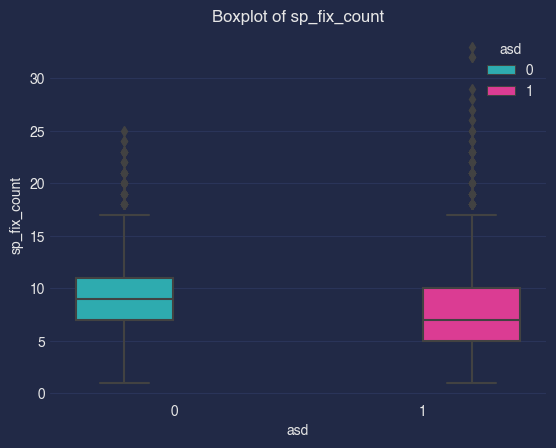

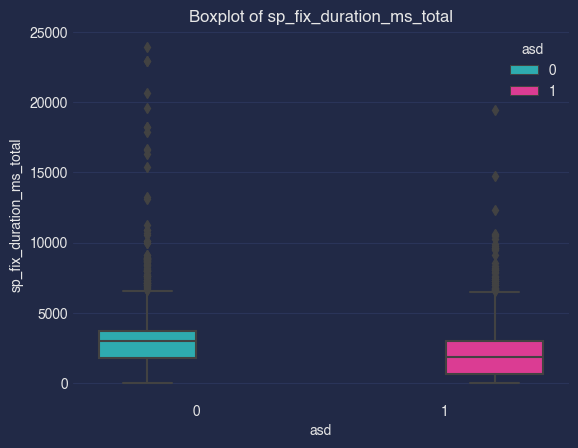

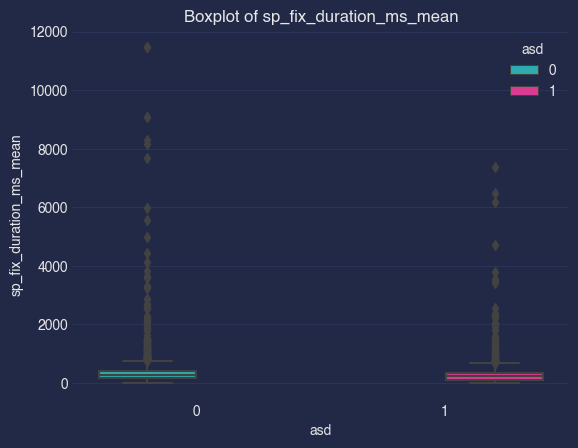

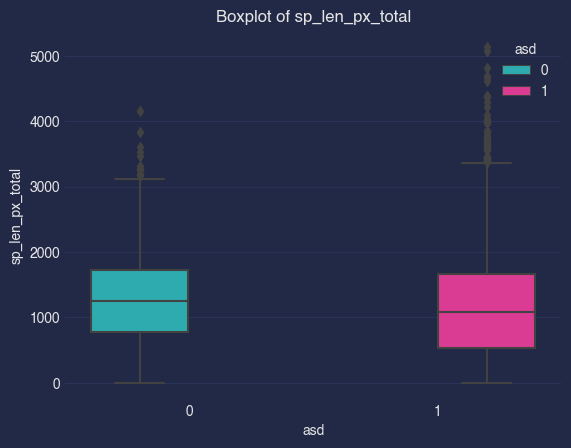

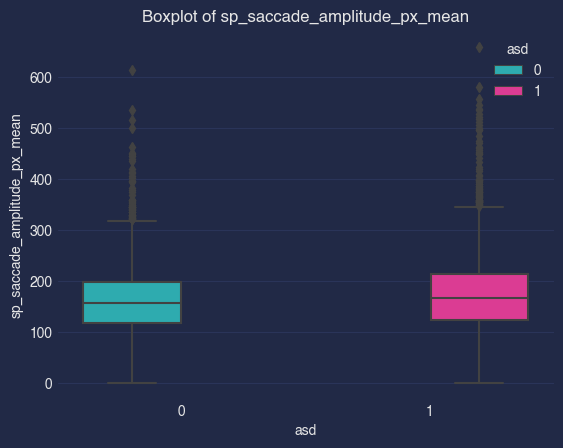

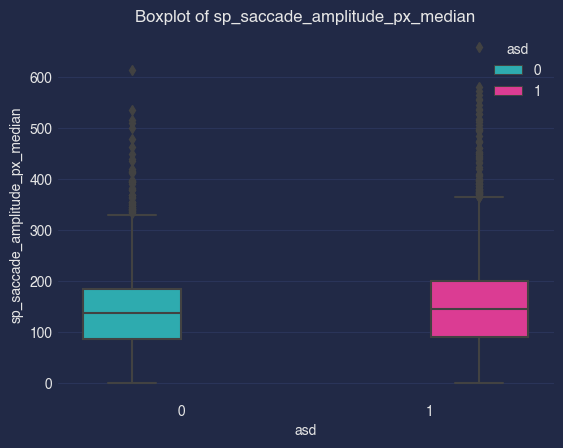

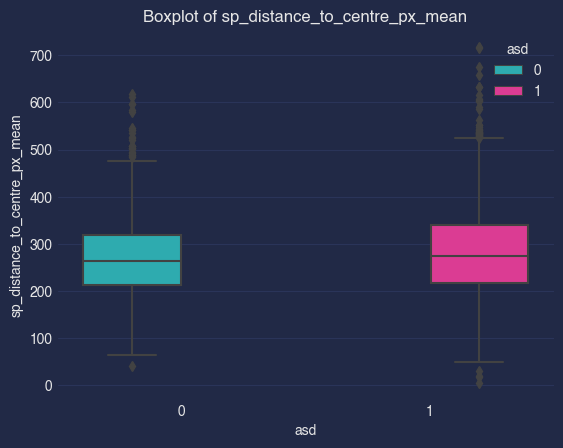

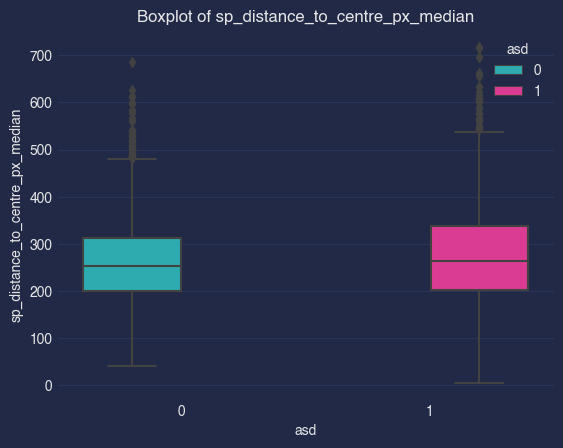

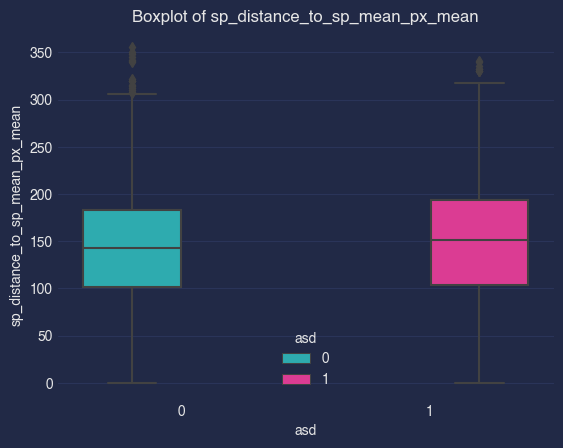

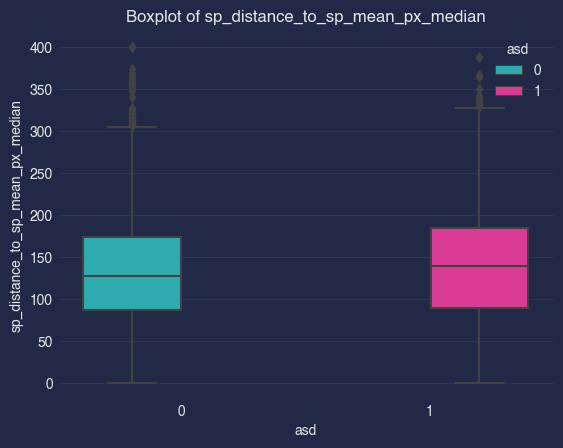

In [21]:

for col in box_cols:
    sns.boxplot(data=df, x="asd", y=col, hue="asd")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [22]:
X = df.drop("asd", axis=1)
y = df["asd"]

In [24]:
X.head()

,img,sp_idx,sp_fix_count,sp_fix_duration_ms_total,sp_fix_duration_ms_mean,sp_len_px_total,sp_saccade_amplitude_px_mean,sp_saccade_amplitude_px_median,sp_distance_to_centre_px_mean,sp_distance_to_centre_px_median,sp_distance_to_sp_mean_px_mean,sp_distance_to_sp_mean_px_median
0,126,0,12,2098,174.833333,1734.793605,157.708510,159.088026,227.831857,226.993379,184.724185,194.257522
1,126,1,12,3572,297.666667,1772.309555,161.119050,154.304893,242.881637,221.051469,198.851422,150.777681
2,126,2,5,349,69.800000,837.418654,209.354663,204.225322,308.465269,299.132078,175.714929,131.979392
3,126,3,1,50,50.000000,0.000000,0.000000,0.000000,603.238759,603.238759,0.000000,0.000000
4,126,4,1,108,108.000000,0.000000,0.000000,0.000000,238.533017,238.533017,0.000000,0.000000


In [25]:
X.columns

Index(['img', 'sp_idx', 'sp_fix_count', 'sp_fix_duration_ms_total',
       'sp_fix_duration_ms_mean', 'sp_len_px_total',
       'sp_saccade_amplitude_px_mean', 'sp_saccade_amplitude_px_median',
       'sp_distance_to_centre_px_mean', 'sp_distance_to_centre_px_median',
       'sp_distance_to_sp_mean_px_mean', 'sp_distance_to_sp_mean_px_median'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

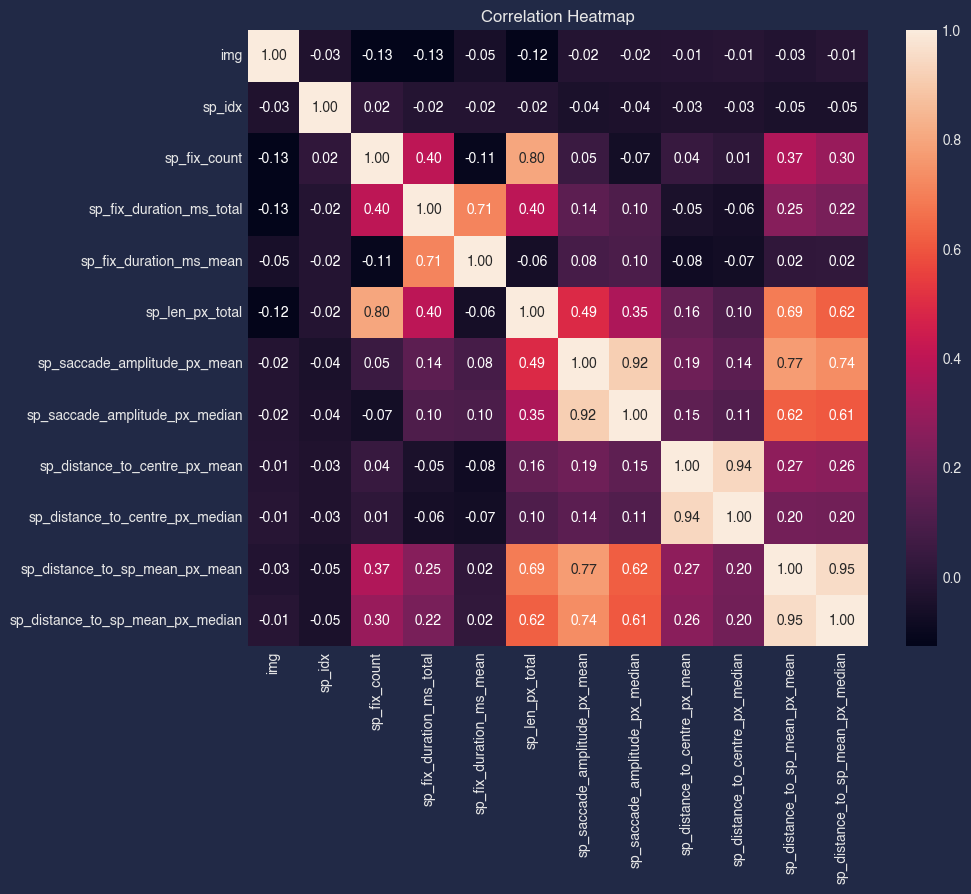

In [56]:
corr_matrix = X.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show

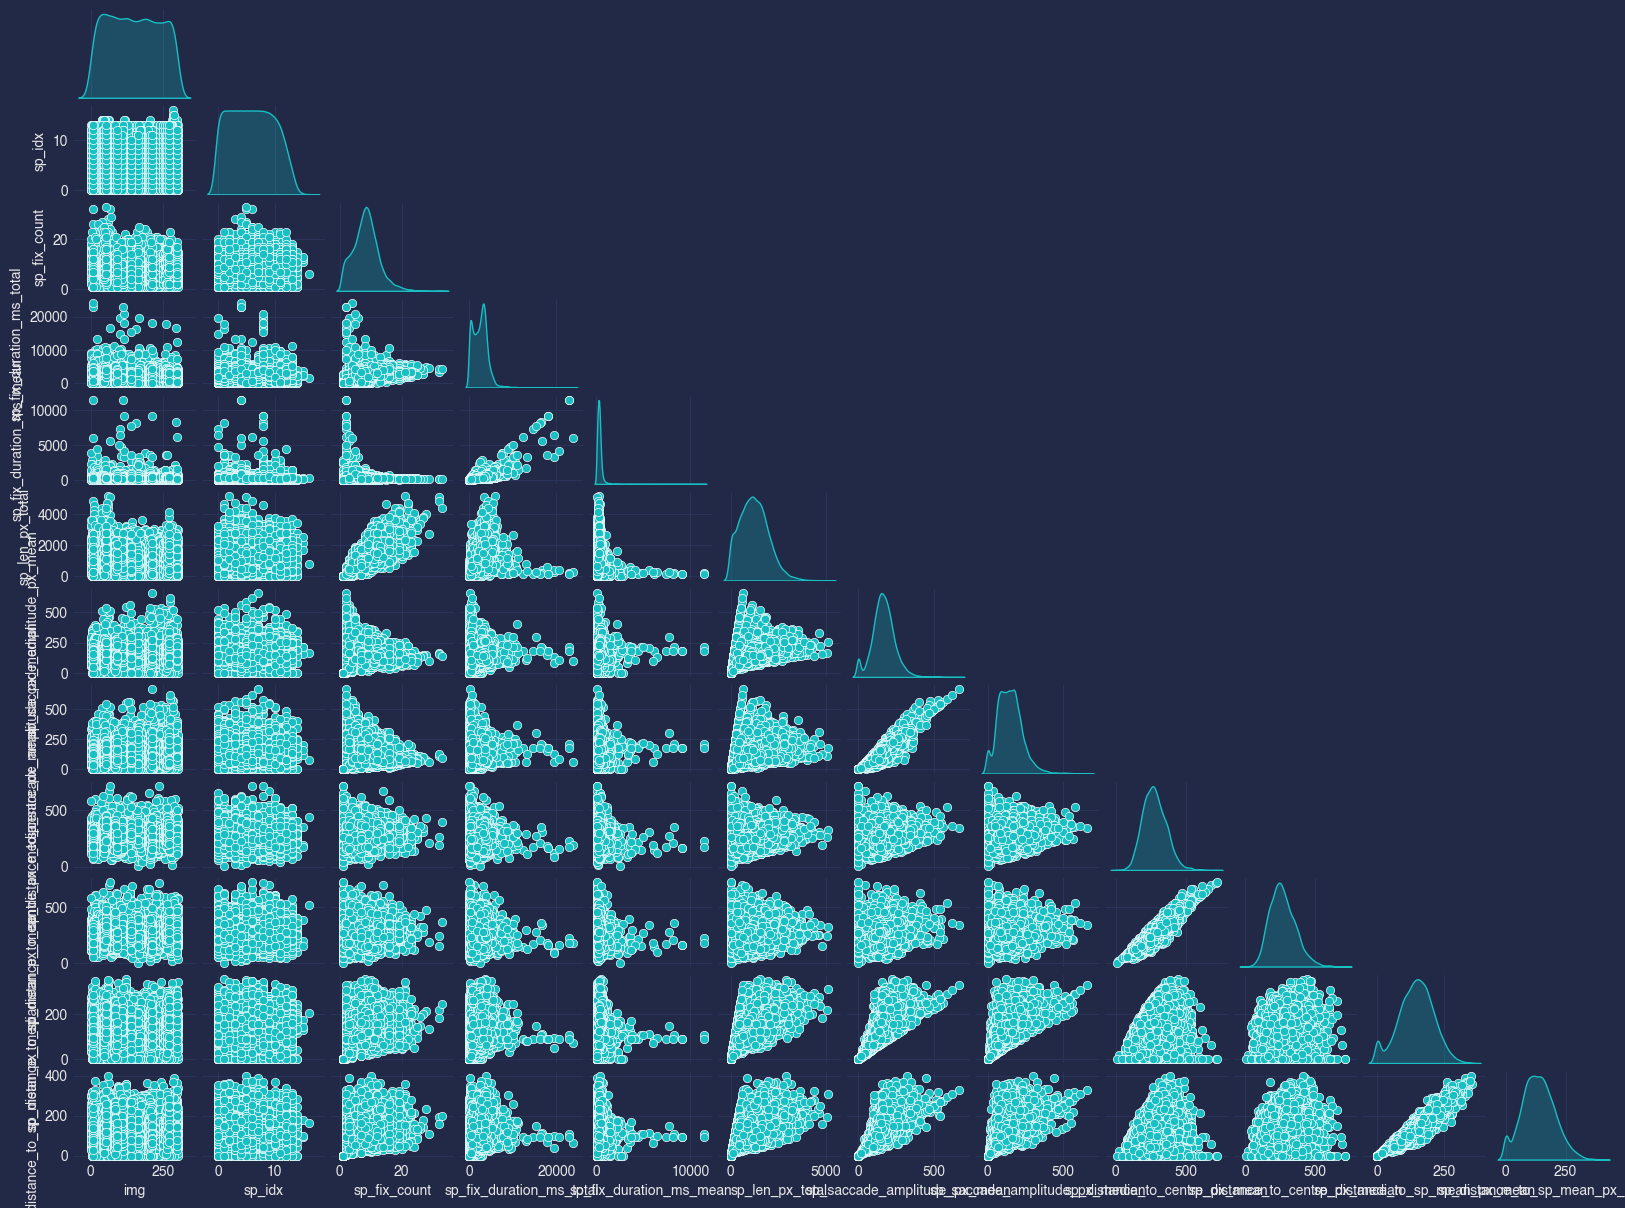

In [67]:
# Define the number of columns
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(X.columns) + num_cols - 1) // num_cols

# Calculate the figure size based on the number of columns and rows
fig_width = num_cols * 4
fig_height = num_rows * 4

# Create pairplot with 4 plots per row
pairplot = sns.pairplot(X, height=2, aspect=2, diag_kind='kde', diag_kws=dict(fill=True), plot_kws=dict(marker='o'), corner=True)

# Adjust the figure size
pairplot.fig.set_size_inches(fig_width, fig_height)

plt.show()

In [27]:
X.describe()


,img,sp_idx,sp_fix_count,sp_fix_duration_ms_total,sp_fix_duration_ms_mean,sp_len_px_total,sp_saccade_amplitude_px_mean,sp_saccade_amplitude_px_median,sp_distance_to_centre_px_mean,sp_distance_to_centre_px_median,sp_distance_to_sp_mean_px_mean,sp_distance_to_sp_mean_px_median
count,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000
mean,148.511187,5.903659,8.374177,2444.236115,314.784375,1222.903174,163.833048,146.104500,274.398813,266.794750,144.249609,134.837162
std,87.196296,3.761892,4.144698,1776.884770,432.340284,748.715971,74.732576,80.738674,83.245360,92.281365,64.846688,67.739896
min,1.000000,0.000000,1.000000,8.000000,8.000000,0.000000,0.000000,0.000000,5.656854,5.656854,0.000000,0.000000
25%,72.000000,3.000000,6.000000,1059.000000,149.762500,665.259039,119.385560,87.682556,215.168835,201.533671,102.184542,87.899213
50%,147.000000,6.000000,8.000000,2490.500000,258.031250,1182.280920,161.501649,140.466341,268.561274,257.968501,146.940081,132.524275
75%,224.000000,9.000000,11.000000,3464.000000,375.354167,1700.213781,205.767118,191.837539,328.344822,324.018617,188.310098,179.467877
max,300.000000,16.000000,33.000000,23957.000000,11483.000000,5136.983917,660.337035,660.337035,717.915907,717.915907,355.900341,400.406064


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
num_cols = ['sp_fix_duration_ms_total',
       'sp_fix_duration_ms_mean', 'sp_len_px_total',
       'sp_saccade_amplitude_px_mean', 'sp_saccade_amplitude_px_median',
       'sp_distance_to_centre_px_mean', 'sp_distance_to_centre_px_median',
       'sp_distance_to_sp_mean_px_mean', 'sp_distance_to_sp_mean_px_median']

cat_cols = ["img", "sp_idx", "sp_fix_count"]
print("Num Cols:", num_cols)
print("Cat Cols:", cat_cols)

Num Cols: ['sp_fix_duration_ms_total', 'sp_fix_duration_ms_mean', 'sp_len_px_total', 'sp_saccade_amplitude_px_mean', 'sp_saccade_amplitude_px_median', 'sp_distance_to_centre_px_mean', 'sp_distance_to_centre_px_median', 'sp_distance_to_sp_mean_px_mean', 'sp_distance_to_sp_mean_px_median']
Cat Cols: ['img', 'sp_idx', 'sp_fix_count']


In [32]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [42]:
param_grid_rf = {
    "n_estimators": [100,200,300],
    "max_depth": [None,10,20],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
    }

param_grid_xgb = {
    "n_estimators": [100,200,300],
    "max_depth": [3,5,7],
    "learning_rate":[0.1,0.01,0.001]
}

In [44]:
xgb = XGBClassifier(random_state = 42)

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="accuracy")
grid_search_xgb.fit(X_train,y_train)

best_params_xgb = grid_search_xgb.best_params_
best_est_xgb = grid_search_xgb.best_estimator_

print("Best params for xgb are:", best_params_xgb)
print("Best est for xgb are:", best_est_xgb)

Best params for xgb are: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Best est for xgb are: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


Best params for xgb are: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Best est for xgb are: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [43]:
# Random Forrest Model
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid= param_grid_rf,cv=5,scoring="accuracy")
grid_search_rf.fit(X_train,y_train)

best_params_rf = grid_search_rf.best_params_
best_est_rf = grid_search_rf.best_estimator_
print("Best params for RF are:", best_params_rf)
print("Best est for RF are:", best_est_rf)

Best params for RF are: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best est for RF are: RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42)


Best params for RF are: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best est for RF are: RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [46]:
# For the Best Random Forrest Model Prediction
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train,y_train)
pred_rf = best_rf.predict(X_test)

# For the Best XGB Model Predict
best_xgb = XGBClassifier(**best_params_xgb, random_state = 42)

best_xgb.fit(X_train,y_train)

pred_xgb = best_xgb.predict(X_test)



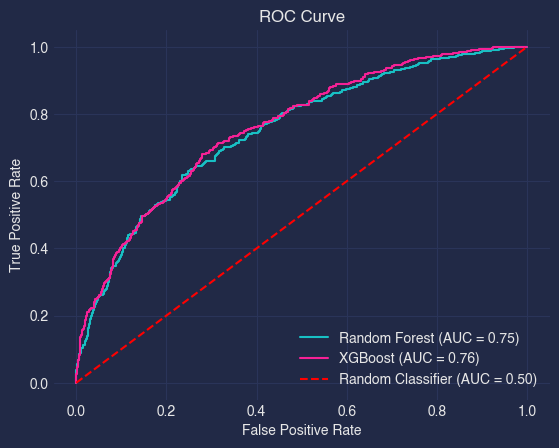

In [47]:
# Compute ROC AUC score for Random Forest
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Compute ROC AUC score for XGBoost
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier (AUC = 0.50)')

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show plot
plt.show()

In [49]:
# Print classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, best_rf.predict(X_test)))

# Print classification report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, best_xgb.predict(X_test)))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       752
           1       0.69      0.67      0.68       768

    accuracy                           0.68      1520
   macro avg       0.68      0.68      0.68      1520
weighted avg       0.68      0.68      0.68      1520


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       752
           1       0.71      0.68      0.70       768

    accuracy                           0.70      1520
   macro avg       0.70      0.70      0.70      1520
weighted avg       0.70      0.70      0.70      1520



In [55]:
# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test))
confusion_df_rf = pd.DataFrame(cm_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix for Random Forest:")
print(confusion_df_rf)

# Calculate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, best_xgb.predict(X_test))
confusion_df_xgb = pd.DataFrame(cm_xgb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("\nConfusion Matrix for XGBoost:")
print(confusion_df_xgb)

Confusion Matrix for Random Forest:
          Predicted 0  Predicted 1
Actual 0          520          232
Actual 1          254          514

Confusion Matrix for XGBoost:
          Predicted 0  Predicted 1
Actual 0          542          210
Actual 1          246          522


In [68]:
# Compute accuracy scores for Random Forest
train_accuracy_rf = accuracy_score(y_train, best_rf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, best_rf.predict(X_test))

print("Accuracy Score for Random Forest (Train):", train_accuracy_rf)
print("Accuracy Score for Random Forest (Test):", test_accuracy_rf)

# Compute accuracy scores for XGBoost
train_accuracy_xgb = accuracy_score(y_train, best_xgb.predict(X_train))
test_accuracy_xgb = accuracy_score(y_test, best_xgb.predict(X_test))

print("\nAccuracy Score for XGBoost (Train):", train_accuracy_xgb)
print("Accuracy Score for XGBoost (Test):", test_accuracy_xgb)

Accuracy Score for Random Forest (Train): 0.9633102994406054
Accuracy Score for Random Forest (Test): 0.6802631578947368

Accuracy Score for XGBoost (Train): 0.8382691674893057
Accuracy Score for XGBoost (Test): 0.7


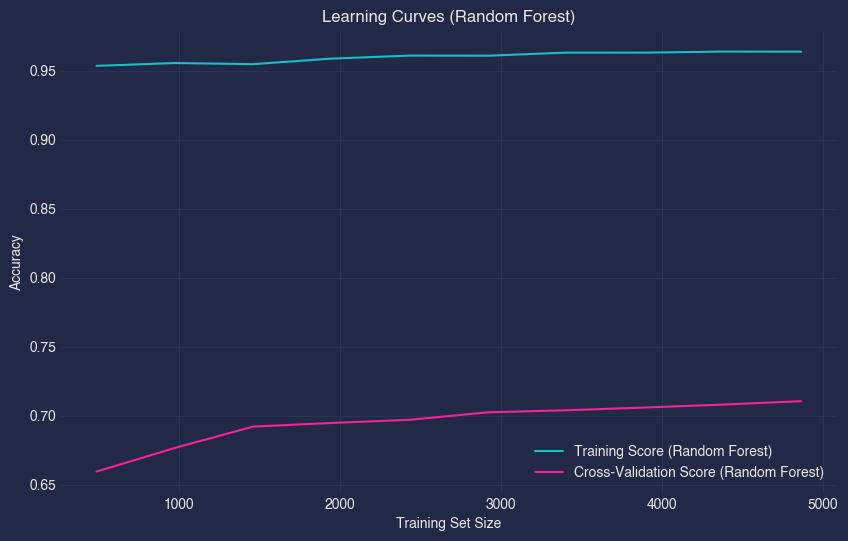

Cross-Validation Scores (Random Forest): [0.72861842 0.71381579 0.71463816 0.7127572  0.69300412]


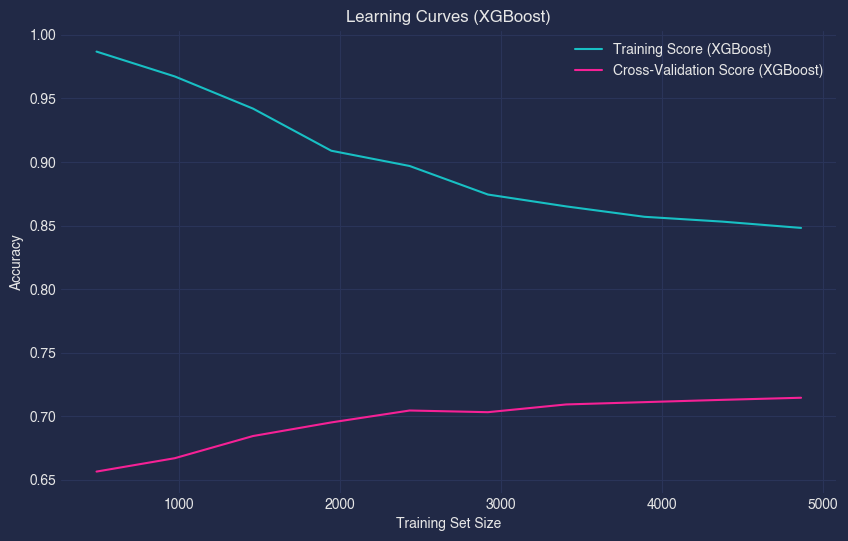

Cross-Validation Scores (XGBoost): [0.72779605 0.70970395 0.69490132 0.73744856 0.70617284]


In [71]:
# Learning curves for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training Score (Random Forest)')
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label='Cross-Validation Score (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

# Learning curves for XGBoost
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_xgb, np.mean(train_scores_xgb, axis=1), label='Training Score (XGBoost)')
plt.plot(train_sizes_xgb, np.mean(test_scores_xgb, axis=1), label='Cross-Validation Score (XGBoost)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation scores for XGBoost
cv_scores_xgb = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (XGBoost):", cv_scores_xgb)

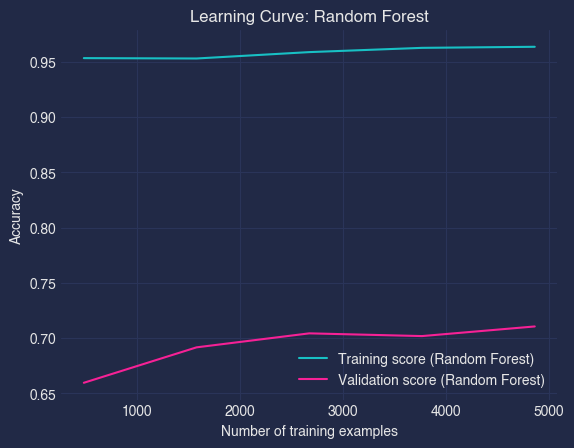

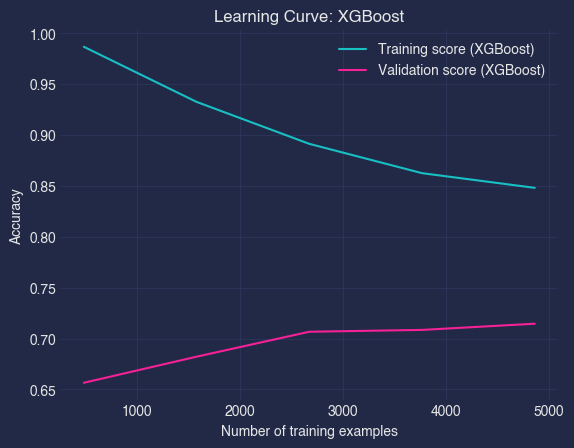

In [72]:
# Plot learning curve for Random Forest
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(best_rf, X_train, y_train, cv=5)

plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training score (Random Forest)')
plt.plot(train_sizes_rf, np.mean(val_scores_rf, axis=1), label='Validation score (Random Forest)')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Random Forest')
plt.legend()
plt.show()

# Plot learning curve for XGBoost
train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(best_xgb, X_train, y_train, cv=5)

plt.plot(train_sizes_xgb, np.mean(train_scores_xgb, axis=1), label='Training score (XGBoost)')
plt.plot(train_sizes_xgb, np.mean(val_scores_xgb, axis=1), label='Validation score (XGBoost)')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve: XGBoost')
plt.legend()
plt.show()